In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import wandb
import matplotlib as mpl
from jetnet.datasets import JetNet
import jetnet


/home/rd804/.conda/envs/discr-metric/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/rd804/.conda/envs/discr-metric/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cd ..

/home/rd804/discriminator-metric


In [3]:
from scripts.conversion import *

train
length of label 0:  100000
length of label 1:  100000


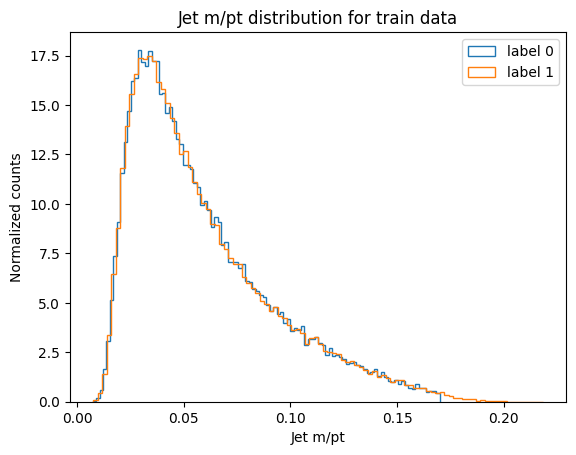

valid
length of label 0:  50000
length of label 1:  50000


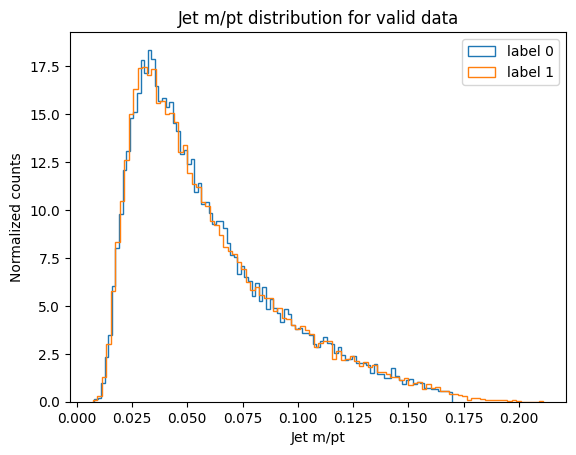

In [5]:
split = ['train','valid']

for s in split:
        data = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{s}').values.reshape(-1,30,4)
        labels = pd.read_hdf('data/jetnet30_data.h5', f'labels_{s}')['labels'].values
        #labels = f[f'labels_{s}']
        pt = pt_jets(data)
        m = mjj_jets(data)
        #assert len(data) == len(labels)
        print(s)
        print('length of label 0: ', len(labels[labels==0]))
        print('length of label 1: ', len(labels[labels==1]))
        figure = plt.figure()

        plt.hist(m[labels==0], bins=100, 
                 histtype='step', label='label 0',density=True)
        plt.hist(m[labels==1], bins=100, 
                 histtype='step', label='label 1', density=True)
        plt.legend()
        plt.xlabel('Jet m/pt')
        plt.ylabel('Normalized counts')
        plt.title(f'Jet m/pt distribution for {s} data')
        plt.show()







In [22]:
train = len(pd.read_hdf('data/jetnet_data.h5', f'jet_data_train'))

In [23]:
val = len(pd.read_hdf('data/jetnet_data.h5', f'jet_data_val'))

In [24]:
train + val

173951

In [34]:
jet, _ = JetNet.getData(jet_type=["g"], data_dir="data/",
                jet_features=["pt", "eta", "mass",
                    "num_particles"],
                    split_fraction = [0.7,0.3,0.0],split="train"
                    ,num_particles=150)

In [35]:
jet.shape

(124076, 150, 4)

# Verify conversion

In [4]:
from scripts.conversion import *

In [4]:
split= ['train']

(121793,)
(121793, 4)


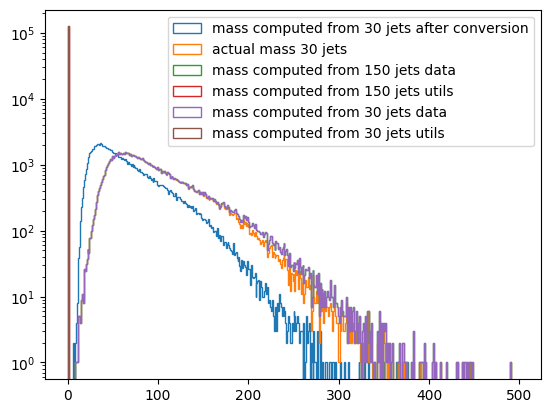

In [7]:
for s in split:
    data = pd.read_hdf('data/jetnet30_data.h5', f'jet_data_{s}')
    particle_data = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{s}').values.reshape(-1,30,4)
    labels = pd.read_hdf('data/jetnet30_data.h5', f'labels_{s}')['labels']
    print(labels.shape)
    
    print(data.shape)
    mass_particle = mjj_jets(particle_data)
    pt_particle = pt_jets(particle_data)

    particle_jetnet150, jet_jetnet150 = JetNet.getData(jet_type=["g"], data_dir="data/",
                                             jet_features=["pt", "eta", "mass",
                                                           "num_particles"],
                                            split_fraction = [0.7,0.15,0.15],
                                            split="train",num_particles=150)
    mass_jetnet150_utils = jetnet.utils.jet_features(particle_jetnet150[:, :, :3])["mass"]
   

    particle_jetnet30, jet_jetnet30 = JetNet.getData(jet_type=["g"], data_dir="data/",
                                             jet_features=["pt", "eta", "mass",
                                                           "num_particles"],
                                            split_fraction = [0.7,0.15,0.15],
                                            split="train")
    mass_jetnet30_utils = jetnet.utils.jet_features(particle_jetnet30[:, :, :3])["mass"]
   
   
    diff_mass = mass_particle - data['mass'].values
    diff_pt = pt_particle - data['pt'].values

    #plt.hist(diff_mass, bins=50, histtype='step', label='mass', density=True)
 

  #  plt.hist(np.abs(diff_mass)/data['mass'], bins=100, histtype='step', label='difference of masses')
  #  plt.yscale('log')
  #  plt.legend()
  #  plt.show()

    #plt.hist2d(diff_mass, diff_pt, bins=100,norm=mpl.colors.LogNorm() )
    #plt.xlabel('difference of mass')
    #plt.ylabel('difference of pt')
   # plt.show()

    #plt.hist2d(diff_mass, data['num_particles'], bins=100,norm=mpl.colors.LogNorm() )
    #plt.xlabel('difference of mass')
    #plt.ylabel('constituents')
    #plt.show()







 #   plt.hist((mass_particle/pt_particle)[labels==0], bins=100, histtype='step', label='label 0'
  #           ,density=True)
 #   plt.hist((mass_particle/pt_particle)[labels==1], bins=100, histtype='step', label='label 1'
   #          ,density=True)

   # plt.show()



    

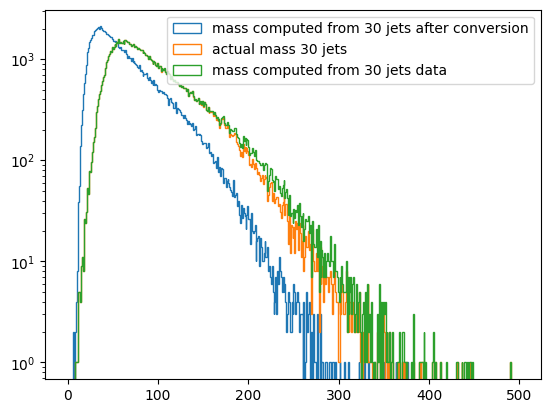

In [10]:
plt.hist(mass_particle, bins=np.arange(0,500,1), histtype='step', label='mass computed from 30 jets after conversion')
plt.hist(data['mass'], bins=np.arange(0,500,1), histtype='step', label='actual mass 30 jets')
#plt.hist(jet_jetnet150[:,2], bins=np.arange(0,500,1), histtype='step', label='mass computed from 150 jets data')
#plt.hist(mass_jetnet150_utils, bins=np.arange(0,500,1), histtype='step', label='mass computed from 150 jets utils')
plt.hist(jet_jetnet30[:,2], bins=np.arange(0,500,1), histtype='step', label='mass computed from 30 jets data')
#plt.hist(mass_jetnet30_utils, bins=np.arange(0,500,1), histtype='step', label='mass computed from 30 jets utils')

plt.yscale('log')
plt.legend()
plt.show()

In [7]:
particle_data

array([[[ 1.29299820e+02,  8.90019684e+01, -1.64845359e+00,
         -9.37783279e+01],
        [ 1.25472916e+02,  8.56737442e+01,  2.60021782e+00,
         -9.16335068e+01],
        [ 9.59775162e+01,  6.66714172e+01,  1.54705358e+00,
         -6.90232773e+01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00]],

       [[ 1.08063416e+02,  1.08047554e+02,  8.94721806e-01,
         -1.62082958e+00],
        [ 8.74499283e+01,  8.74076920e+01,  9.49483514e-01,
         -2.54616332e+00],
        [ 7.64300308e+01,  7.64096756e+01,  4.91304457e-01,
         -1.69387782e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00],
        [ 0.000

In [4]:
truth = np.load('data/truth.npy')
tailcut = np.load('data/tailcut.npy')

In [ ]:
plt.hist(truth, bins=100, histtype='step', label='truth')
plt.hist(tailcut, bins=100, histtype='step', label='tailcut')
plt.legend()
plt.show()

In [39]:
particle_data, jet_data = JetNet.getData(jet_type=["g"], data_dir="data/",
                                             jet_features=["pt", "eta", "mass",
                                                           "num_particles"],
                                            split_fraction = [0.7,0.15,0.15],
                                            split="train")

In [42]:
particle_data, jet_data = JetNet.getData(jet_type=["g"], data_dir="data/",
                                             jet_features=["pt", "eta", "mass",
                                                           "num_particles"],
                                            split_fraction = [0.7,0.3,0.0],
                                            split="train")
mass_particle = jetnet.utils.jet_features(particle_data[:, :, :3])["mass"]

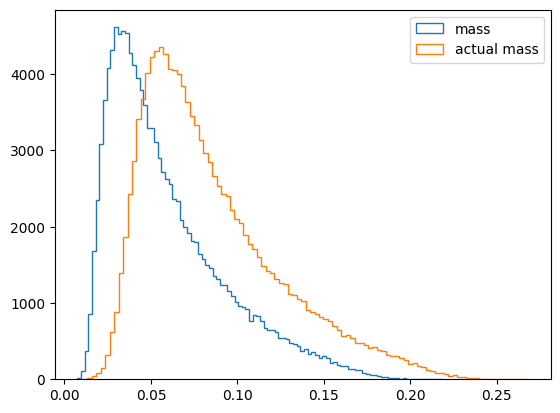

In [50]:
plt.hist(mass_particle, bins=100, histtype='step', label='mass')
plt.hist(jet_data[:,2]/jet_data[:,0], bins=100, histtype='step', label='actual mass')
#plt.yscale('log')
plt.legend()
plt.show()

In [12]:
mass_cut = jetnet.utils.jet_features(tailcut[:, :, :3])["mass"]
mass_truth = jetnet.utils.jet_features(truth[:, :, :3])["mass"]

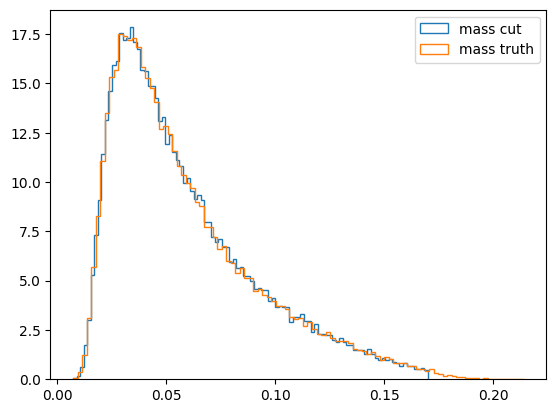

In [14]:
plt.hist(mass_cut, bins=100, histtype='step', label='mass cut',density=True)
plt.hist(mass_truth, bins=100, histtype='step', label='mass truth',density=True)
plt.legend()
plt.show()

In [16]:
mass_cut.shape

(150000,)

In [17]:
mass_truth.shape


(150000,)